# 이미지 처리 및 numpy 배열 변환 종합

이 노트북은 다음 내용을 다룹니다:
1. **기본 이미지 처리**: PIL을 사용한 이미지 읽기 및 numpy 배열 변환
2. **다중 이미지 처리**: 폴더의 여러 이미지를 배치 처리
3. **MNIST 이미지 처리**: 손글씨 숫자 이미지 데이터 처리

## 사전 준비
- 이미지 파일들이 `./images/` 폴더에 준비되어 있어야 합니다
- `./images/animal/` 폴더에 동물 이미지들
- `./images/mnist/` 폴더에 MNIST 손글씨 이미지들


In [1]:
# 필요한 라이브러리 import
import PIL.Image as pilimg  # 이미지 처리를 위한 PIL
import os                   # 파이썬에서 OS 명령어를 사용할 수 있게 해줌
import matplotlib.pyplot as plt  # 모든 그래픽 출력은 pyplot으로
import numpy as np          # 이미지를 numpy 배열로 변환


## 1. 기본 이미지 처리

단일 이미지를 읽어서 numpy 배열로 변환하는 기본적인 방법을 학습합니다.
- 이미지 파일을 PIL로 읽기
- numpy 배열로 변환
- 이미지 형식 변환 및 저장


In [2]:
# 이미지를 읽어서 ndarray로 바꾸는 방법
img = pilimg.open("./img/1.jpg")
print("이미지 타입:", type(img))

# PIL 이미지를 numpy 배열로 변환
pix = np.array(img)  # ndarray로 변환
print("이미지 형태:", pix.shape)  # 컬러이미지라 3차원이 나온다

# 이미지 데이터의 일부를 출력해보기 (주석 처리된 반복문)
# for i in range(pix.shape[0]):
#     for j in range(pix.shape[1]):
#         for k in range(pix.shape[2]):
#             print("{0:3}".format(pix[i][j][k]), end=' ')
#     print()

print("픽셀 데이터 (처음 몇 개):")
print(pix[:5, :5, :])  # 처음 5x5 픽셀의 RGB 값 출력

# 형식을 바꾸어서 저장해보자
img.save("./img/.etc/1.bmp")
print("이미지가 BMP 형식으로 저장되었습니다.")

print(f"\n이미지 크기 정보:")
print(f"- 높이: {pix.shape[0]}")
print(f"- 너비: {pix.shape[1]}")
print(f"- 채널(RGB): {pix.shape[2]}")
print(f"=> {pix.shape[0]} X {pix.shape[1]} X {pix.shape[2]} 형태")


이미지 타입: <class 'PIL.WebPImagePlugin.WebPImageFile'>
이미지 형태: (340, 514, 3)
픽셀 데이터 (처음 몇 개):
[[[83 24 69]
  [83 24 69]
  [83 24 69]
  [83 24 69]
  [84 24 72]]

 [[83 24 69]
  [83 24 69]
  [83 24 69]
  [83 24 69]
  [84 24 72]]

 [[83 24 69]
  [83 24 69]
  [83 24 69]
  [83 24 69]
  [84 24 72]]

 [[83 24 69]
  [83 24 69]
  [83 24 69]
  [83 23 71]
  [84 24 72]]

 [[83 23 71]
  [83 23 71]
  [83 23 71]
  [83 23 71]
  [84 24 74]]]
이미지가 BMP 형식으로 저장되었습니다.

이미지 크기 정보:
- 높이: 340
- 너비: 514
- 채널(RGB): 3
=> 340 X 514 X 3 형태


## 2. 다중 이미지 처리 (Animal 데이터셋)

특정 폴더의 이미지들을 배치로 처리하는 방법을 학습합니다.
- 폴더에서 여러 이미지 파일 읽기
- 이미지 크기 조정 (리사이징)
- 여러 이미지를 numpy 배열로 변환
- NPZ 파일로 저장 및 로드
- 이미지 시각화


In [3]:
# 특정폴더의 이미지를 읽어서 전부 numpy 배열로 바꾸고 다 더해서 npz파일로 저장하기
# 이미지(4차원, 3차원이미지가 여러장이라서)를 2차원 ndarray로 바꾸는 방법

path = "./img/animal"
filenameList = os.listdir(path)  # 해당경로에 있는 모든 파일을 읽어서 파일목록을 전달
print(f"폴더 '{path}'에서 발견된 파일들:")
print(filenameList[:10])  # 처음 10개 파일명만 출력

imageList = []
for filename in filenameList:
    filepath = path + "/" + filename 
    temp = pilimg.open(filepath)
    
    # 이미지 크기 축소 (80x80으로 리사이징)
    img = temp.resize((80, 80))  # tuple로 전달 
    img = np.array(img)
    print(f"{filename}: {img.shape}")
    imageList.append(img)  # 리스트에 추가

print(f"\n총 {len(imageList)}개의 이미지가 처리되었습니다.")

# numpy 압축 파일로 저장
np.savez("./data/data_animal.npz", data=imageList)
print("data_animal.npz 파일로 저장 완료!")


폴더 './img/animal'에서 발견된 파일들:
['cat.jpg', 'cat1.jpg', 'cat2.jpg', 'cat3.jpg', 'cat4.jpg', 'cat5.jpg', 'dog1.jpg', 'dog2.jpg', 'dog3.jpg', 'dog4.jpg']
cat.jpg: (80, 80, 3)
cat1.jpg: (80, 80, 3)
cat2.jpg: (80, 80, 3)
cat3.jpg: (80, 80, 3)
cat4.jpg: (80, 80, 3)
cat5.jpg: (80, 80, 3)
dog1.jpg: (80, 80, 3)
dog2.jpg: (80, 80, 3)
dog3.jpg: (80, 80, 3)
dog4.jpg: (80, 80, 3)
dog5.jpg: (80, 80, 3)

총 11개의 이미지가 처리되었습니다.
data_animal.npz 파일로 저장 완료!


로드된 데이터 형태: 11개 이미지


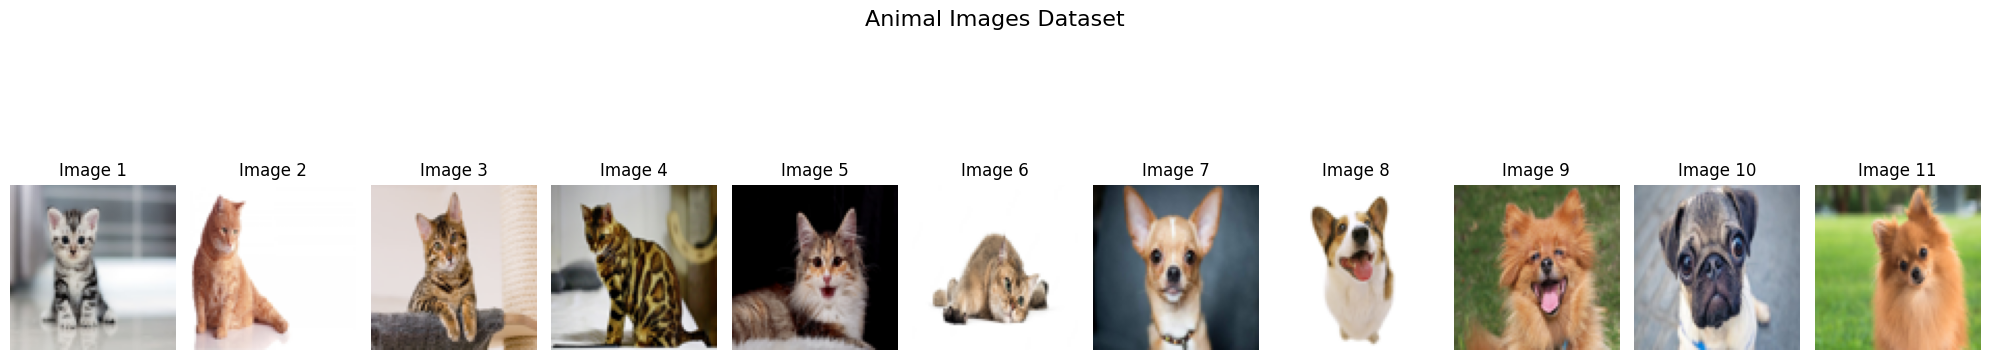

In [4]:
# 저장된 데이터 로드 및 시각화
data_animal = np.load("./data/data_animal.npz")["data"]
print(f"로드된 데이터 형태: {len(data_animal)}개 이미지")

# 이미지들을 한 줄로 시각화
plt.figure(figsize=(20, 5))
num_images = min(11, len(data_animal))  # 최대 11개까지만 표시

for i in range(1, num_images + 1):
    plt.subplot(1, num_images, i)  # 차트의 공간을 1 by n개로 나누고 1부터 번호 시작
    plt.imshow(data_animal[i-1])
    plt.title(f"Image {i}")
    plt.axis('off')  # 축 숨기기

plt.suptitle("Animal Images Dataset", fontsize=16)
plt.tight_layout()
plt.show()

## 3. MNIST 이미지 처리

손글씨 숫자 이미지 데이터를 처리하는 방법을 학습합니다.
- MNIST 폴더에서 이미지 읽기
- 제한된 개수만 처리 (성능 고려)
- 머신러닝을 위한 데이터 준비 방법
- 이미지 시각화

**참고**: 압축을 풀면 daisy, dandelion, rose, sunflower, tulip 폴더가 나오며,  
이 이미지들로 머신러닝을 할 때는 입력데이터는 2D, 라벨링은 1D로 폴더별로 0,1,2,3,4로 구성해야 합니다.


In [5]:
# MNIST 폴더의 이미지를 처리 (제한된 개수만)
path = "./img/mnist"
filenameList = os.listdir(path)  # 해당경로에 있는 모든 파일을 읽어서 파일목록 가져오기
print(f"MNIST 폴더에서 발견된 파일 개수: {len(filenameList)}")

imageList = []
i = 0
max_images = 10  # 처음 10개만 처리

for filename in filenameList:
    filepath = path + "/" + filename 
    temp = pilimg.open(filepath)
    
    # 이미지 크기 축소 (80x80으로 리사이징)
    img = temp.resize((80, 80))  # tuple로 전달 
    img = np.array(img)
    print(f"{filename}: {img.shape}")
    imageList.append(img)  # 리스트에 추가
    
    i += 1
    if i >= max_images:
        print(f"\n성능을 위해 {max_images}개만 처리합니다.")
        break 

# numpy 압축 파일로 저장
np.savez("./data/data_mnist.npz", data=imageList)
print(f"data_mnist.npz 파일로 저장 완료! ({len(imageList)}개 이미지)")


MNIST 폴더에서 발견된 파일 개수: 1000
0.jpg: (80, 80)
1.jpg: (80, 80)
10.jpg: (80, 80)
100.jpg: (80, 80)
101.jpg: (80, 80)
102.jpg: (80, 80)
103.jpg: (80, 80)
104.jpg: (80, 80)
105.jpg: (80, 80)
106.jpg: (80, 80)

성능을 위해 10개만 처리합니다.
data_mnist.npz 파일로 저장 완료! (10개 이미지)


로드된 MNIST 데이터: 10개 이미지


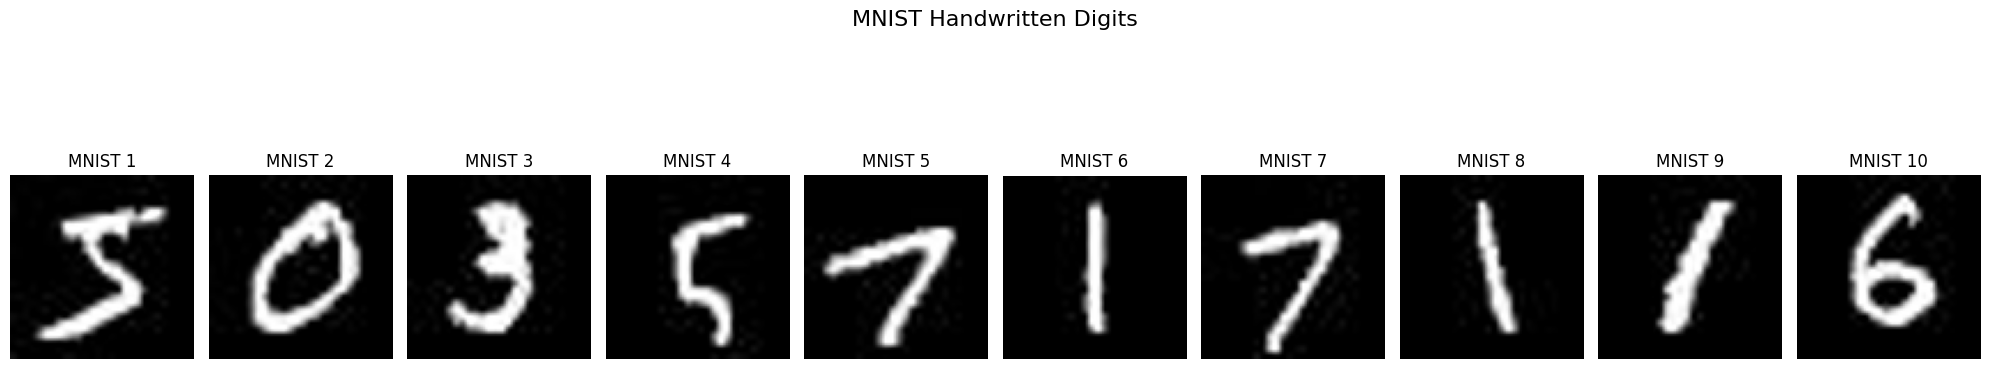

In [6]:
# MNIST 데이터 로드 및 시각화
data_mnist = np.load("./data/data_mnist.npz")["data"]
print(f"로드된 MNIST 데이터: {len(data_mnist)}개 이미지")

# MNIST 이미지들을 한 줄로 시각화
plt.figure(figsize=(20, 5))
num_images = min(10, len(data_mnist))

for i in range(1, num_images + 1):
    plt.subplot(1, num_images, i)  # 차트의 공간을 1 by n개로 나누고 1부터 번호 시작
    plt.imshow(data_mnist[i-1], cmap='gray')  # MNIST는 보통 grayscale로 표시
    plt.title(f"MNIST {i}")
    plt.axis('off')  # 축 숨기기

plt.suptitle("MNIST Handwritten Digits", fontsize=16)
plt.tight_layout()
plt.show()

## 4. 머신러닝을 위한 데이터 준비

이미지 데이터를 머신러닝 모델에 사용하기 위해서는 다음과 같은 형태로 변환해야 합니다:

### 데이터 형태 변환
- **입력 데이터 (X)**: 2차원 배열 형태로 변환
  - 원본: (이미지개수, 높이, 너비, 채널) = 4차원
  - 변환: (이미지개수, 높이×너비×채널) = 2차원
  
- **라벨 데이터 (y)**: 1차원 배열
  - 폴더명을 기준으로 카테고리 인코딩
  - 예: daisy=0, dandelion=1, rose=2, sunflower=3, tulip=4

### 예시 데이터셋 구조
```markdown
images/
  ├── flowers/
  │   ├── daisy/        → 라벨: 0
  │   ├── dandelion/    → 라벨: 1  
  │   ├── rose/         → 라벨: 2
  │   ├── sunflower/    → 라벨: 3
  │   └── tulip/        → 라벨: 4
  └── ...
```


In [7]:
# 머신러닝을 위한 데이터 변환 예시
print("=== 데이터 변환 예시 ===")

# 동물 데이터를 예시로 사용
sample_data = data_animal[:5] if 'data_animal' in locals() else data_mnist[:5]
print(f"원본 데이터 형태: {np.array(sample_data).shape}")

# 4차원 → 2차원 변환 (flatten)
X_reshaped = np.array(sample_data).reshape(len(sample_data), -1)
print(f"변환된 데이터 형태: {X_reshaped.shape}")
print(f"각 이미지당 특성 수: {X_reshaped.shape[1]}")

# 라벨 생성 예시 (실제로는 폴더명을 기반으로 자동 생성)
y_example = np.array([0, 1, 2, 3, 4])  # 5개 카테고리 예시
print(f"라벨 형태: {y_example.shape}")
print(f"라벨 값: {y_example}")

print("\n=== 머신러닝 모델 입력 준비 완료 ===")
print(f"X (입력): {X_reshaped.shape} - 2차원 배열")
print(f"y (라벨): {y_example.shape} - 1차원 배열")

# 실제 픽셀 값 범위 확인
print(f"\n픽셀 값 범위: {X_reshaped.min()} ~ {X_reshaped.max()}")
print("참고: 머신러닝 전에 0-1 범위로 정규화하는 것이 좋습니다. (X / 255.0)")


=== 데이터 변환 예시 ===
원본 데이터 형태: (5, 80, 80, 3)
변환된 데이터 형태: (5, 19200)
각 이미지당 특성 수: 19200
라벨 형태: (5,)
라벨 값: [0 1 2 3 4]

=== 머신러닝 모델 입력 준비 완료 ===
X (입력): (5, 19200) - 2차원 배열
y (라벨): (5,) - 1차원 배열

픽셀 값 범위: 0 ~ 255
참고: 머신러닝 전에 0-1 범위로 정규화하는 것이 좋습니다. (X / 255.0)


## 5. 요약

이 노트북에서 학습한 주요 내용:

### 핵심 기술
1. **PIL (Python Imaging Library)**: 이미지 읽기, 크기 조정, 형식 변환
2. **NumPy**: 이미지를 다차원 배열로 변환 및 처리
3. **OS 모듈**: 폴더 탐색 및 파일 목록 가져오기
4. **Matplotlib**: 이미지 시각화 및 배치 출력
5. **NPZ 파일**: 대용량 이미지 데이터의 효율적 저장/로드

### 데이터 처리 파이프라인
```python
이미지 파일 → PIL 읽기 → 크기 조정 → NumPy 배열 → 
NPZ 저장 → 로드 → 2D 변환 → 머신러닝 모델 입력
```

### 주요 함수들
- `pilimg.open()`: 이미지 파일 읽기
- `img.resize()`: 이미지 크기 조정
- `np.array()`: PIL 이미지를 NumPy 배열로 변환
- `np.savez()` / `np.load()`: 압축 저장/로드
- `img.reshape(-1)`: 다차원을 1차원으로 평면화

### 다음 단계
이제 이 전처리된 이미지 데이터를 사용하여:
- 분류 모델 (LogisticRegression, RandomForest, CNN 등) 학습
- 특성 추출 및 차원 축소
- 데이터 증강 (Data Augmentation) 적용
- 전이 학습 (Transfer Learning) 활용
